# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Load dataframes

In [3]:
items = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items.csv', sep = '|')
transactions = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions.csv', sep = '|')
evaluation = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/evaluation.csv')
cos_sims = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/cosine_similarities.csv', low_memory = False)

In [4]:
items[items['itemID']==61261]

,itemID,title,author,publisher,main topic,subtopics
15979,61261,Die drei ??? Kids 45 - Ein Fall für Superhelde...,Ulf Blanck,dtv Verlagsgesellschaft,YFCF,"[5AJ,1KBB-US-WPC,YXHB]"


In [5]:
items['subtopics'] = items['subtopics'].str.replace('[','')
items['subtopics'] = items['subtopics'].str.replace(']','')
items['subtopics'] = items['subtopics'].str.replace(',',' ')
#eval_items['subtopics'] = eval_items['subtopics'].str.replace('[','')
#eval_items['subtopics'] = eval_items['subtopics'].str.replace(']','')
#eval_items['subtopics'] = eval_items['subtopics'].str.replace(',',' ')

In [353]:
cos_sims.iloc[0,0] = cos_similarity
cos_sims.pop('itemID')
cos_sims.head()

,12,45274,10104,41371,14015,28515,70766,1822,56794,60188,...,58358,9569,50163,5357,23570,78384,68157,44964,12971,41078
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.338062,0.0,0.0,0.218218,0.0,0.0,0.0,0.0,0.377964,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447214,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.447214,0.0


In [346]:
a = eval_items['subtopics'][1]
b = items['subtopics'][1]
print(a)
print(b)
a = a.split()
b = b.split()

getcossim(a,b)

YFZR YXHB
5AJ AGZ WFA YBG YBL YNA YPA


0.1336306209562122

In [153]:
# count number of evaluation items with no subtopics
counter = 0
for i in range(0, len(eval_items)):
    a = eval_items['subtopics'][i]
    a = a.split()
    if len(a)==0:
        counter = counter + 1

print("Items with zero subtopics: ", counter)

Items with zero subtopics:  418


In [ ]:
if len(a)==0 or len(b)==0:
    cos_similarity = 0
else:
    cos_similarity = len(set(a).intersection(set(b)))/math.sqrt(len(a)*len(b))

In [78]:
sim = []
sim.append(0)
sim.append(2)
sim[0] = sim[0] + 1
sum(sim)

3

In [117]:
def getcossim(a,b):
    dot_product = []
    for i in range(0, len(a)):
        sim = []
        for j in range(0, len(b)):
            sim.append(0)
            for k in range(0, min(len(a[i]), len(b[j]))):
                if a[i][k]==b[j][k]:
                    sim[j] = sim[j] + 1
                else:
                    break
        dot_product.append(max(sim)/len(a[i]))
    cos_similarity = sum(dot_product)/math.sqrt(len(a)*len(b))
    return cos_similarity

2

In [6]:
eval_items = items[0:0]
count = 0
for i in range(0, len(evaluation)):
    if evaluation['itemID'][i] in items['itemID']:
        print(i)
    x = items[items['itemID']==evaluation['itemID'][i]]
    print(x['itemID'])
    eval_items = eval_items.append(x, ignore_index=True)

len(evaluation)
len(eval_items)

0
26541    12
Name: itemID, dtype: int64
1
34822    45274
Name: itemID, dtype: int64
2
61709    10104
Name: itemID, dtype: int64
3
19660    41371
Name: itemID, dtype: int64
4
29881    14015
Name: itemID, dtype: int64
5
73762    28515
Name: itemID, dtype: int64
6
18309    70766
Name: itemID, dtype: int64
7
16496    1822
Name: itemID, dtype: int64
8
5808    56794
Name: itemID, dtype: int64
9
63958    60188
Name: itemID, dtype: int64
10
4762    62060
Name: itemID, dtype: int64
11
66829    31401
Name: itemID, dtype: int64
12
62287    6420
Name: itemID, dtype: int64
13
65570    72855
Name: itemID, dtype: int64
14
8652    73378
Name: itemID, dtype: int64
15
18070    25049
Name: itemID, dtype: int64
16
290    24603
Name: itemID, dtype: int64
17
24164    5737
Name: itemID, dtype: int64
18
24784    38980
Name: itemID, dtype: int64
19
14063    13382
Name: itemID, dtype: int64
20
68321    75121
Name: itemID, dtype: int64
21
26152    39779
Name: itemID, dtype: int64
22
68469    14026
Name: itemID,

5300    14189
Name: itemID, dtype: int64
264
14381    9884
Name: itemID, dtype: int64
265
5835    67630
Name: itemID, dtype: int64
266
10046    11407
Name: itemID, dtype: int64
267
864    8384
Name: itemID, dtype: int64
268
33580    75345
Name: itemID, dtype: int64
269
25009    45841
Name: itemID, dtype: int64
270
48877    63764
Name: itemID, dtype: int64
271
465    70197
Name: itemID, dtype: int64
272
4808    32109
Name: itemID, dtype: int64
273
25409    30434
Name: itemID, dtype: int64
274
42069    45358
Name: itemID, dtype: int64
275
15047    52721
Name: itemID, dtype: int64
276
15435    58820
Name: itemID, dtype: int64
277
8253    70803
Name: itemID, dtype: int64
278
1430    50338
Name: itemID, dtype: int64
279
66532    66493
Name: itemID, dtype: int64
280
10149    52519
Name: itemID, dtype: int64
281
Series([], Name: itemID, dtype: int64)
282
6496    49952
Name: itemID, dtype: int64
283
41100    75882
Name: itemID, dtype: int64
284
33661    7445
Name: itemID, dtype: int64
285
2862

41046    41447
Name: itemID, dtype: int64
459
46917    57018
Name: itemID, dtype: int64
460
15448    69755
Name: itemID, dtype: int64
461
11705    16190
Name: itemID, dtype: int64
462
25585    48231
Name: itemID, dtype: int64
463
65367    58737
Name: itemID, dtype: int64
464
41658    9001
Name: itemID, dtype: int64
465
27206    19462
Name: itemID, dtype: int64
466
15584    15267
Name: itemID, dtype: int64
467
37762    68076
Name: itemID, dtype: int64
468
17890    17617
Name: itemID, dtype: int64
469
6063    43701
Name: itemID, dtype: int64
470
74160    66224
Name: itemID, dtype: int64
471
8100    23132
Name: itemID, dtype: int64
472
23959    23535
Name: itemID, dtype: int64
473
49507    18479
Name: itemID, dtype: int64
474
70550    63017
Name: itemID, dtype: int64
475
42600    61316
Name: itemID, dtype: int64
476
13503    56775
Name: itemID, dtype: int64
477
59051    66954
Name: itemID, dtype: int64
478
54692    32532
Name: itemID, dtype: int64
479
9569    53813
Name: itemID, dtype: in

4806    5300
Name: itemID, dtype: int64
650
25311    54461
Name: itemID, dtype: int64
651
64219    10326
Name: itemID, dtype: int64
652
14700    1071
Name: itemID, dtype: int64
653
32889    20234
Name: itemID, dtype: int64
654
31497    4525
Name: itemID, dtype: int64
655
12504    62509
Name: itemID, dtype: int64
656
59175    39941
Name: itemID, dtype: int64
657
48107    3583
Name: itemID, dtype: int64
658
70072    35236
Name: itemID, dtype: int64
659
22134    42326
Name: itemID, dtype: int64
660
11043    22868
Name: itemID, dtype: int64
661
9938    28533
Name: itemID, dtype: int64
662
38862    61752
Name: itemID, dtype: int64
663
21266    45955
Name: itemID, dtype: int64
664
5493    3166
Name: itemID, dtype: int64
665
6366    1168
Name: itemID, dtype: int64
666
28486    259
Name: itemID, dtype: int64
667
19856    60087
Name: itemID, dtype: int64
668
11982    12311
Name: itemID, dtype: int64
669
16696    66633
Name: itemID, dtype: int64
670
12937    65860
Name: itemID, dtype: int64
671


50960    7028
Name: itemID, dtype: int64
834
71650    56180
Name: itemID, dtype: int64
835
34192    10324
Name: itemID, dtype: int64
836
8878    51443
Name: itemID, dtype: int64
837
50557    65088
Name: itemID, dtype: int64
838
5838    45487
Name: itemID, dtype: int64
839
50335    7201
Name: itemID, dtype: int64
840
41884    3031
Name: itemID, dtype: int64
841
53501    52727
Name: itemID, dtype: int64
842
60754    66360
Name: itemID, dtype: int64
843
16736    70707
Name: itemID, dtype: int64
844
8599    60250
Name: itemID, dtype: int64
845
46918    70223
Name: itemID, dtype: int64
846
5719    12103
Name: itemID, dtype: int64
847
29798    29580
Name: itemID, dtype: int64
848
46379    3472
Name: itemID, dtype: int64
849
4332    66315
Name: itemID, dtype: int64
850
56898    58455
Name: itemID, dtype: int64
851
21563    9424
Name: itemID, dtype: int64
852
32819    56705
Name: itemID, dtype: int64
853
71549    54338
Name: itemID, dtype: int64
854
64411    70923
Name: itemID, dtype: int64
85

998

In [53]:
# get the item ID of the 281st row in evaluation.csv file
print(evaluation['itemID'][281])
# check if that item ID is in the items.csv file
print(evaluation['itemID'][281] in items['itemID'])
# print the row in which this item ID is in the items.csv file
print(items[items['itemID']==evaluation['itemID'][281]])

37378
True
Empty DataFrame
Columns: [itemID, title, author, publisher, main topic, subtopics]
Index: []


In [54]:
# add column subtopics count
def set_subtopic_lenght(x):
    if x=="[]":
        return 0
    elif ',' in str(x):
        return str(x).count(',') + 1
    else:
        return 1
    
items['subtopics count']=items['subtopics'].apply(set_subtopic_lenght)
items.head()

,itemID,title,author,publisher,main topic,subtopics,subtopics count
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",7
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",2
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",5
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",6


In [62]:
# remove characters '[', ']' and ',' from the subtopics lists
items['subtopics'] = items['subtopics'].str.replace('[','')
items['subtopics'] = items['subtopics'].str.replace(']','')
items['subtopics'] = items['subtopics'].str.replace(',',' ')
eval_items['subtopics'] = eval_items['subtopics'].str.replace('[','')
eval_items['subtopics'] = eval_items['subtopics'].str.replace(']','')
eval_items['subtopics'] = eval_items['subtopics'].str.replace(',',' ')
eval_items

,itemID,title,author,publisher,main topic,subtopics
0,12,Breathtaking,Reva Ryann Thompson,Xlibris,FM,
1,45274,The Dead Man in Indian Creek,Mary Downing Hahn,AVON BOOKS,YFCF,YFZR YXHB
2,10104,The Humble Seed,Linda Appleby,Linda Appleby,YFB,YX
3,41371,Dryadenhain & Dschinnenzauber (Märchenanthologie),"Philipp Busch, Jonathan Driedger, Lena Kalupne...",Ulisses Spiel & Medien,FM,FMB WDHW
4,14015,The Man of Steel: Superman vs. the Moon Bandits,Scott Sonneborn,STONE ARCH BOOKS,YFCF,XQK
...,...,...,...,...,...,...
993,78384,Ice Cream for Breakfast,Casey Gillespie,Australian Publishing House,YFQ,
994,68157,Der ewige Krieg,Joe Haldeman,Heyne Taschenbuch,FLR,FJM FLR FM FYT
995,44964,Back to Earth (Greek Edition): The Adventures ...,Danilo Clementoni,NaN,FM,
996,12971,Sharks - Read it yourself with Ladybird: Level...,Ladybird,Penguin Random House Children's UK,YNNB,YBL


In [5]:
# sample A.B
a = items['subtopics'][1]
b = items['subtopics'][4]
a = a.split()
b = b.split()
a[0]
len(set(a).intersection(set(b)))/math.sqrt(len(a)*len(b)) 

0.0

In [64]:
# create dataframe that will be filled with cosine similarities
cos_sims = pd.DataFrame(columns=[eval_items['itemID']], index=range(len(items)))
cos_sims

itemID,12,45274,10104,41371,14015,28515,70766,1822,56794,60188,...,58358,9569,50163,5357,23570,78384,68157,44964,12971,41078
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
a = eval_items['subtopics'][167]
b = items['subtopics'][78]
print(a)
print(b)
a = a.split()
b = b.split()

if len(a)==0 or len(b)==0:
    cos_similarity = 0
else:
    cos_similarity = len(set(a).intersection(set(b)))/math.sqrt(len(a)*len(b))

cos_similarity

YFC YFH YFN
5AN YDP YFH YFN YXQ


0.5163977794943222

In [85]:
len(eval_items)

998

In [154]:
# time for processing the dataframe
import time
t0= time.time()

#for i in range(0, len(eval_items)):
for i in range(0, 10):
    a = eval_items['subtopics'][i]
    a = a.split()
    print("item number = ", i , "    time elapsed = ", time.time() - t0)
    if len(a)==0:
        continue
    for j in range(0, len(items)):
        b = items['subtopics'][j]
        if pd.isna(b):
            b = "" # missing values are considered as empty strings
        b = b.split()
        if len(a)==0 or len(b)==0:
            cos_similarity = 0
        else:
            #cos_similarity = len(set(a) & set(b))/math.sqrt(len(a)*len(b))
            cos_similarity = getcossim(a,b)
        cos_sims.iloc[j,i] = cos_similarity

print("total time elapsed = ", time.time() - t0)
cos_sims.head()
# change indices of dataframme to itemIDs
# cos_sims.set_index(items['itemID'],inplace=True)
# store as a .csv file to desktop
#cos_sims.to_csv(r'C:\Users\Hassan Ali\Desktop\cosine_sims.csv')


item number =  5     time elapsed =  0.0
item number =  6     time elapsed =  0.0
item number =  7     time elapsed =  0.0009708404541015625


KeyboardInterrupt: 

In [38]:
col_num = 4
x = cos_sims[cos_sims[cos_sims.columns[col_num]]==cos_sims[cos_sims.columns[col_num]].max()]
len(x)

104

In [68]:
col_num = 3
print(items[items['itemID']==cos_sims.columns[col_num]])
items.iloc[628]

       itemID                                              title  \
19660   41371  Dryadenhain & Dschinnenzauber (Märchenanthologie)   

                                                  author  \
19660  Philipp Busch, Jonathan Driedger, Lena Kalupne...   

                    publisher main topic subtopics  subtopics count  
19660  Ulisses Spiel & Medien         FM  FMB WDHW                2  


itemID                                    63081
title              Rüstkammer des Dornenreiches
author                               Alex Spohr
publisher                Ulisses Spiel & Medien
main topic                                   FM
subtopics                              FMB WDHW
subtopics count                               2
Name: 628, dtype: object

In [156]:
#cos_sims.set_index(items['itemID'],inplace=True)
cos_sims

,itemID,12,45274,10104,41371,14015,28515,70766,1822,56794,...,58358,9569,50163,5357,23570,78384,68157,44964,12971,41078
0,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.133631,0.188982,0.066815,0.0,0.0,0.0,0.125988,0.000000,0.188982,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.353553,0.000000,...,0.338062,0.0,0.0,0.218218,0.0,0.0,0.0,0.0,0.377964,0.0
3,0,0.237171,0.223607,0.000000,0.0,0.0,0.0,0.298142,0.000000,0.447214,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0.144338,0.204124,0.144338,0.0,0.0,0.0,0.136083,0.000000,0.204124,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.447214,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78026,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
78027,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
78028,0,0.375000,0.353553,0.000000,0.0,0.0,0.0,0.707107,0.000000,0.707107,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
78029,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Segelraumschiff Gurk Fock #1 

6845      Punkt zu Punkt - Mit den Zahlen von 1 bis 100
19128                             Die Turing-Abweichung
10276                             Ruf der Vergangenheit
15751                                      Little Women
57300                      Sunny and the Hotel Splendid
19372       Mein erstes Stickerbuch: Der Weihnachtsmann
4961                      Malen nach Zahlen: Zauberwald
14957                                   A.I. Apocalypse
10740      Der kleine Vampir und die große Verschwörung
13608    Die Greifen-Saga (Band 2): Die Träne der Wüste
Name: title, dtype: object


(array([7.6452e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 7.0000e+00, 2.8000e+01,
        2.7000e+01, 4.9000e+01, 2.9000e+01, 2.2000e+01, 3.9000e+01,
        8.7000e+01, 8.4000e+01, 0.0000e+00, 7.9000e+01, 0.0000e+00,
        8.2000e+01, 0.0000e+00, 4.0000e+00, 1.7800e+02, 1.1000e+01,
        6.0000e+00, 0.0000e+00, 8.0000e+00, 2.2900e+02, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        3.0600e+02, 0.0000e+00, 0.0000e+00, 1.1000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.3000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0300e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

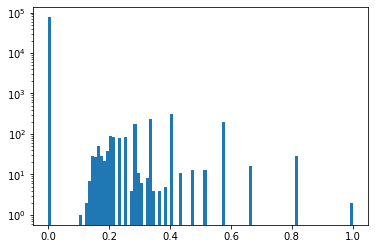

In [341]:
#threshold to select 
threshold = 0.80

#index number
i = 60

#for i in range(1, len(eval_items)):
x = []
col = cos_sims.iloc[:,i]
col = col.sort_values(ascending = False)
x = col.index[col>threshold]
x = x.tolist()
del x[10:]
print(eval_items['title'][i],"\n")
print(items['title'][x])

plt.hist(col, bins = 100, log = True)
#col = cos_sims.iloc[:,1]
#print(col.index[col == 1])

In [292]:
col = cos_sims.iloc[:,1]
col = col.sort_values(ascending = False)
x = col.index[col>0.5]
x = x.tolist()
del x[5:]
print(items['title'][x])

72199                                  Bye-Bye, Blue Creek
34822                         The Dead Man in Indian Creek
63118    The Wheels -The Friendship Race (Turkish Edition)
61387                                             Gonzonia
68821                        Duck Derby Debacle, Volume 16
Name: title, dtype: object


In [ ]:
cos_sims.to_csv(r'C:\Users\Hassan Ali\Desktop\cosine_similarities.csv')

In [44]:
x = cos_sims.columns[col_num]
x

(41371,)

In [265]:
cos_sims = cos_sims.T

In [212]:
i = 1
j = 0
a = eval_items['subtopics'][i]
a = a.split(" ")
print(a[0])
b = items['subtopics'][j]
if pd.isna(b):
    b = "" #missing values are considered as empty strings; no subtopics
b = b.split(" ")
print(b[0])
if len(a)==0 or len(b)==0:
    cos_similarity = 0
else:
    cos_similarity = len(set(a).intersection(set(b)))/math.sqrt(len(a)*len(b))

cos_similarity
len(set(a) & set(b))

YFZR
5AH


0

In [5]:
cos_sims.head()

,itemID,12,45274,10104,41371,14015,28515,70766,1822,56794,...,58358,9569,50163,5357,23570,78384,68157,44964,12971,41078
0,itemID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,73018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.338062,0.0,0.0,0.218218,0.0,0.0,0.0,0.0,0.377964,0.0
3,19194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,40250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.447214,0.0


In [58]:
# column and row item ID
# cos_sims.columns[1]
# cos_sims.iloc[1]['itemID']

# cos_sims.iloc[1:10,95:102]

lengths = []
for i in range(1,999):
    x = cos_sims[cos_sims[cos_sims.columns[i]]==cos_sims[cos_sims.columns[i]].max()]
    if len(x) == 78030:
        lengths.append(0)
    else:
        lengths.append(len(x))

 

(array([418., 141.,  33.,  28.,  26.]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

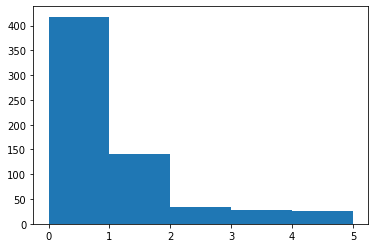

In [68]:
plt.hist(lengths, bins = [0,1,2,3,4,5])

# Dataframe 'items'

In [30]:
items.head()

,itemID,title,author,publisher,main topic,subtopics,subtopics count
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,5AH,1
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,5AJ AGZ WFA YBG YBL YNA YPA,7
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,5AP FBA,2
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,5AC 5AD YBG YBL YF,5
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,WD WFTM YBG YBL YBLD YBLN1,6


In [79]:
print('Shape: ', items.shape)
print('\nNumber of unique values in each column')
print(items.nunique())

Shape:  (78030, 6)

Number of unique values in each column
itemID        78030
title         72128
author        35969
publisher      7072
main topic      699
subtopics     11381
dtype: int64


**Book Titles (by frequency)**

In [116]:
items.groupby('title')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,title,count
0,The Secret Garden,25
1,Anne of Green Gables,19
2,Alice's Adventures in Wonderland,18
3,The Railway Children,17
4,Peter Pan,16
...,...,...
72123,Romancing the cold fusion,1
72124,Romancing the Nerd,1
72125,Romancero croato,1
72126,Romance of the Snob Squad,1


<AxesSubplot:>

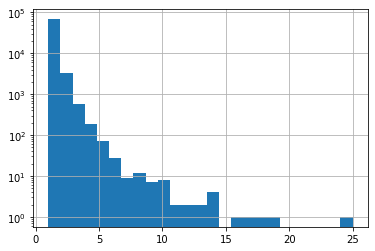

In [185]:
items.groupby('title')['itemID'].count().hist(bins = 25, log = True)

*Some book titles are assigned multiple IDs, e.g. because they're from a different publisher. The subtopics for the same title are different!*

In [108]:
items[items['title']=="The Secret Garden"]

,itemID,title,author,publisher,main topic,subtopics
1125,27694,The Secret Garden,Frances Hodgson Burnett,BANTAM CLASSICS,YFA,[]
1126,64095,The Secret Garden,Francis Hodgson Burnett,Oxford Childrens Books,YFA,[YFC]
1128,57016,The Secret Garden,Frances Hodgson Burnett,DOVER PUBN INC,YFA,[]
6702,64984,The Secret Garden,Frances Hodgson Burnett,HarperCollins Publishers,YFA,[]
7856,4999,The Secret Garden,"Claire Freedman, Frances Hodgson Burnett",Penguin Books Ltd (UK),YBCS,"[5AF,1DDU-GB-EYK,YFA]"
8457,16007,The Secret Garden,Frances Hodgson Burnett,Arcturus Publishing Ltd,YFA,[]
11977,11654,The Secret Garden,Frances Hodgson Burnett,HarperCollins Publishers Inc,YFA,[]
12309,59542,The Secret Garden,Frances Hodgson Burnett,Random House UK Ltd,YFA,"[5AL,1DDU-GB-EYK,FBC,YFB,3MPB]"
14404,26733,The Secret Garden,Frances Hodgson Burnett,WORDSWORTH ED,YFA,[]
23034,26213,The Secret Garden,Frances Hodgson Burnett,Faber & Faber,YFA,[5AJ]


**Authors (by frequency)**

In [112]:
items.groupby('author')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,author,count
0,Garcia Santiago,1479
1,"Shelley Admont, Kidkiddos Books",228
2,James Manning,180
3,Jules Verne,178
4,Idries Shah,168
...,...,...
35964,Mae Clair,1
35965,Maevi Silver,1
35966,Magali Lefebvre,1
35967,Magali Raynaud,1


<AxesSubplot:>

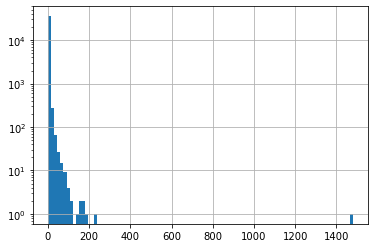

In [178]:
items.groupby('author')['itemID'].count().hist(bins = 100, log = True)

**Publishers (by frequency)**

In [113]:
items.groupby('publisher')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,publisher,count
0,Books on Demand,3759
1,LIGHTNING SOURCE INC,2355
2,Lulu.com,1717
3,Xlibris,1576
4,Fichas de preescolar,1499
...,...,...
7067,Main Donau Verlag,1
7068,Mairisch Verlag,1
7069,Majestic Kids,1
7070,Make Your Mark Global,1


<AxesSubplot:>

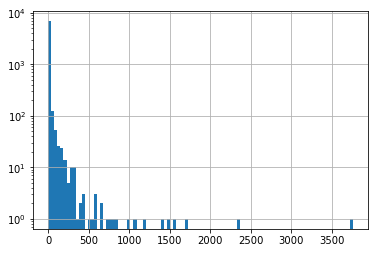

In [180]:
items.groupby('publisher')['itemID'].count().hist(bins = 100, log = True)

**Main Topics (by frequency)**

In [114]:
items.groupby('main topic')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,main topic,count
0,FM,6536
1,YFB,5104
2,FL,4576
3,YFH,4149
4,YFC,3468
...,...,...
694,TJFM1,1
695,TQSR,1
696,GBA,1
697,TTDX,1


<AxesSubplot:>

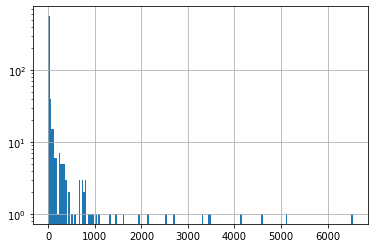

In [10]:
items.groupby('main topic')['itemID'].count().hist(bins = 200, log = True)

**Subtopics (by frequency)**

In [115]:
items.groupby('subtopics')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,subtopics,count
0,[],36904
1,[YF],1425
2,[FL],1076
3,[YFQ],854
4,[FM],841
...,...,...
11376,"[5AQ,1DFG,YXF,YXN,3MRBF]",1
11377,"[5AQ,1DFG,YFCF,YXHB,YXHL,YXLD,YXQ,YXR,3MRBF,3M...",1
11378,"[5AQ,1DFG,YFA,YFT,YXHB,YXZW,3MPBFB]",1
11379,"[5AQ,1DFG,FLC,FLQ]",1


<AxesSubplot:>

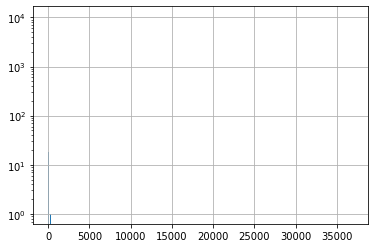

In [4]:
items.groupby('subtopics')['itemID'].count().hist(bins = 11380, log = True)

**'subtopics count' (add a new column to the dataframe to indicate the number of subtopics for each book title)**

In [205]:
def set_subtopic_lenght(x):
    if x=="[]":
        return 0
    elif ',' in str(x):
        return str(x).count(',') + 1
    else:
        return 1
    
items['subtopics count']=items['subtopics'].apply(set_subtopic_lenght)
items.head()

,itemID,title,author,publisher,main topic,subtopics,subtopics count
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],1
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",7
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",2
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",5
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",6


In [211]:
items[items['subtopics count']==0]

,itemID,title,author,publisher,main topic,subtopics,subtopics count
24,44815,Covet,Tracy Wolff,ENTANGLED PUB,YFHR,[],0
31,64544,Spiele-Klassiker Gummitwist-Set,Birgit Fuchs,moses. Verlag GmbH,YBL,[],0
39,42285,Die Dunkelmagierin,Arthur Philipp,Blanvalet Taschenbuchverl,FMB,[],0
40,41198,The Invisible Life of Addie LaRue,V. E. Schwab,Macmillan USA,FM,[],0
41,43845,Small Gods,Terry Pratchett,Orion Publishing Group,FM,[],0
...,...,...,...,...,...,...,...
78023,43284,Elliot Stone and the Mystery of the Backyard T...,L. P. Chase,INFINITY PUB.COM,YFCF,[],0
78024,22071,The Dragon of Prali,Davidson L. Haworth,iUniverse,YFH,[],0
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],0
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],0


**Subtopic counts (by frequency)**

In [197]:
items.groupby('subtopics count')['itemID'].nunique().sort_values(ascending=False).reset_index(name='count')

,subtopics count,count
0,0,36904
1,1,18439
2,2,10726
3,3,4719
4,4,2354
5,5,1478
6,6,980
7,7,661
8,8,463
9,9,316


# Dataframe 'transactions'

In [128]:
transactions.head()

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0


In [214]:
print('\nDataframe \'transactions\' (Number of unique values in each column)')
print('Shape: ', transactions.shape)
print('(Number of unique values in each column)')
print(transactions.nunique())

print("\n")


Dataframe 'transactions' (Number of unique values in each column)
Shape:  (365143, 5)
(Number of unique values in each column)
sessionID    271983
itemID        24909
click            32
basket           45
order            23
dtype: int64


<i>The distributions for the clicks, baskets and orders are very skewed

In [86]:
transactions.describe()

,sessionID,itemID,click,basket,order
count,365143.000000,365143.000000,365143.000000,365143.000000,365143.000000
mean,139586.939175,40051.292307,1.233180,0.141202,0.048403
std,80795.207871,22493.347334,1.069996,1.107574,0.268717
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,69459.500000,20713.000000,1.000000,0.000000,0.000000
50%,139608.000000,40692.000000,1.000000,0.000000,0.000000
75%,209750.500000,58916.000000,1.000000,0.000000,0.000000
max,279354.000000,79066.000000,118.000000,293.000000,28.000000


**Proportion of rows with clicks, baskets and orders**

In [227]:
print('Number of rows with 1 or more clicks: ', len(transactions[transactions['click']>0]))
print('Number of rows with 1 or more baskets: ', len(transactions[transactions['basket']>0]))
print('Number of rows with 1 or more orders: ', len(transactions[transactions['order']>0]))

print('\nPercentage of rows with 1 or more clicks: ', len(transactions[transactions['click']>0])*100/len(transactions))
print('Percentage of rows with 1 or more baskets: ', len(transactions[transactions['basket']>0])*100/len(transactions))
print('Percentage of rows with 1 or more orders: ', len(transactions[transactions['order']>0])*100/len(transactions))

Number of rows with 1 or more clicks:  341595
Number of rows with 1 or more baskets:  44988
Number of rows with 1 or more orders:  16906

Percentage of rows with 1 or more clicks:  93.55101973747271
Percentage of rows with 1 or more baskets:  12.320652456708741
Percentage of rows with 1 or more orders:  4.629966889684315


**Tables of clicks, baskets and orders against each other (Each cell contains percentage values)**

In [258]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

cont_table = pd.crosstab(index=transactions['click'],
                           columns=transactions['basket'], margins=True)
cont_table/(365143/100)


basket,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,28,29,30,36,38,43,48,51,52,58,65,80,98,100,119,150,182,268,287,293,All
click,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.368269,2.938849,0.118036,0.006025,0.004108,0.001643,0.002191,0.000822,0.000000,0.000548,0.001095,0.000548,0.000000,0.000000,0.000274,0.000274,0.000274,0.000274,0.000548,0.000548,0.000000,0.000274,0.001095,0.000274,0.000274,0.000000,0.000274,0.000000,0.000000,0.000274,0.000274,0.000274,0.000000,0.000274,0.000000,0.000548,0.000000,0.000274,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000000,6.448980
1,73.281974,5.512087,0.178560,0.013693,0.003834,0.002465,0.000274,0.001369,0.000822,0.000000,0.001369,0.000274,0.000274,0.000274,0.001095,0.000000,0.000000,0.000000,0.000822,0.000274,0.000274,0.000548,0.000274,0.000274,0.000000,0.000274,0.000000,0.000274,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000274,0.000000,79.002747
2,6.117603,1.651956,0.158842,0.014241,0.002465,0.000548,0.000548,0.001369,0.000000,0.000274,0.000274,0.000822,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000274,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,7.951131
3,2.489436,0.718623,0.070110,0.013419,0.001369,0.000548,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.294052
4,0.956885,0.307277,0.045462,0.012598,0.002191,0.000274,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,1.325782
5,0.615923,0.156377,0.020814,0.004656,0.001643,0.000822,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.801056
6,0.307277,0.094210,0.012598,0.004382,0.001369,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420383
7,0.222652,0.061346,0.010955,0.001369,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.297418
8,0.114476,0.040806,0.006299,0.001643,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163771


In [260]:
cont_table = pd.crosstab(index=transactions['click'],
                           columns=transactions['order'], margins=True)
cont_table/(365143/100)

order,0,1,2,3,4,5,6,7,10,11,12,13,14,15,19,20,21,22,23,25,26,27,28,All
click,,,,,,,,,,,,,,,,,,,,,,,,
0,2.852033,3.539161,0.049022,0.002739,0.001369,0.001369,0.000274,0.000000,0.000000,0.000548,0.000548,0.000000,0.000274,0.000000,0.000274,0.000000,0.000548,0.000274,0.000274,0.000274,0.000000,0.000000,0.000000,6.448980
1,78.378334,0.610720,0.008490,0.001917,0.000274,0.000548,0.000000,0.000274,0.000548,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,0.000000,0.000274,0.000000,0.000274,0.000274,79.002747
2,7.741351,0.203482,0.005477,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,7.951131
3,3.202581,0.087637,0.003286,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.294052
4,1.280594,0.043271,0.001369,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.325782
5,0.779968,0.020266,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.801056
6,0.404499,0.015063,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420383
7,0.290023,0.007394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297418
8,0.159390,0.004108,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163771


In [259]:
cont_table = pd.crosstab(index=transactions['basket'],
                           columns=transactions['order'], margins=True)
cont_table/(365143/100)

order,0,1,2,3,4,5,6,7,10,11,12,13,14,15,19,20,21,22,23,25,26,27,28,All
basket,,,,,,,,,,,,,,,,,,,,,,,,
0,84.289169,3.343074,0.044914,0.001369,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.679348
1,10.470418,1.083959,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.555199
2,0.518153,0.093662,0.021361,0.000548,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633998
3,0.051213,0.019171,0.001369,0.002739,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074765
4,0.013146,0.002739,0.000548,0.000274,0.000822,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018075
5,0.004656,0.000548,0.000548,0.000000,0.000000,0.001095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006847
6,0.002739,0.000548,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003560
7,0.002739,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003834
8,0.001095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001095


**Most clicked, basketed and ordered item IDs**

In [239]:
transactions[transactions['click']>0][['itemID','click']].groupby('itemID').sum().sort_values('click', ascending=False)

,click
itemID,
58522,3229
10666,2218
44220,2204
66247,2194
40692,2020
...,...
61937,1
44602,1
10714,1


In [233]:
transactions[transactions['basket']>0][['itemID','basket']].groupby('itemID').sum().sort_values('basket', ascending=False)

,basket
itemID,
5027,597
23654,408
47120,371
21033,316
69803,262
...,...
39631,1
39621,1
39615,1


In [231]:
transactions[transactions['order']>0][['itemID','order']].groupby('itemID').sum().sort_values('order', ascending=False)

,order
itemID,
53695,170
69803,125
47120,122
13711,93
45799,93
...,...
35286,1
35287,1
35297,1


**Total sales**

In [241]:
print('Total sales: ',transactions['order'].sum())

Total sales:  17674


**Clicks, baskets and orders for each itemID**

In [244]:
transactions[['itemID','click','basket','order']].groupby('itemID').sum()

,click,basket,order
itemID,,,
1,2,0,0
2,17,0,0
6,11,0,0
7,3,0,0
10,14,1,0
...,...,...,...
79057,12,1,0
79058,7,0,0
79059,1,0,0


**Number of itemIDs in each Session**

In [267]:
items_looked_at = transactions.groupby("sessionID").size()
print("Unique SessionIDs: ", len(items_looked_at))
print("Items looked at in one session")
print("max: ", items_looked_at.max(), "\nmin: ", items_looked_at.min(),
      "\nmean: ", items_looked_at.mean())

Unique SessionIDs:  271983
Items looked at in one session
max:  213 
min:  1 
mean:  1.3425214075879743


In [263]:
transactions[['sessionID','itemID']].groupby('sessionID').count()

,itemID
sessionID,
0,1
1,1
2,1
3,1
4,1
...,...
279350,4
279351,1
279352,1


Text(0.5, 1.0, 'Titles viewed per session')

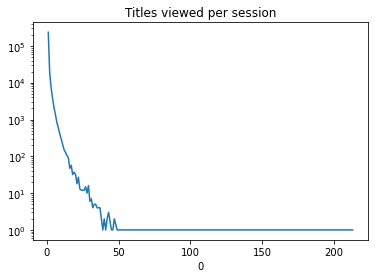

In [271]:
items_looked_at_size = pd.DataFrame(items_looked_at)
items_looked_at_size.groupby(0).size().plot(logy=True)
plt.title('Titles viewed per session')

# Dataframe 'evaluation'

In [27]:
evaluation.head()

,itemID
0,12
1,45274
2,10104
3,41371
4,14015


In [272]:
print('\nDataframe \'evaluations\'')
print('Shape: ', evaluation.shape)


Dataframe 'evaluations'
Shape:  (1000, 1)


*Around half of the item IDs in the evaluation.csv file do not appear in the transactions.csv file*

In [278]:
eval_info_left = pd.merge(evaluation, transactions, how="left", on="itemID")
eval_info_left = pd.merge(eval_info_left, items, how="left", on="itemID")
eval_info_inner = pd.merge(evaluation, transactions, how="inner", on="itemID")
eval_info_inner = pd.merge(eval_info_inner, items, how="left", on="itemID")
items_without_session = eval_info_left["itemID"].count() - eval_info_inner["itemID"].count()
print("Items without session: ", items_without_session)
print("Items with session: ", 1000 - items_without_session)


Items without session:  496
Items with session:  504


In [13]:
eval_session_count = eval_info_left.groupby("itemID").count().sort_values("click", ascending=False)
eval_session_count.head(10).plot.bar(y='sessionID', logy=False)
eval_session_sum = eval_info_left.groupby("itemID").sum()
plt.title('Number of Sessions per Title (only for titles in evaluation.csv)')
plt.show()

NameError: name 'eval_info_left' is not defined